### Part A

In [1]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

In [2]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
#importing kNNImputer drom sklearn.impute
from sklearn.impute import KNNImputer
# Import tree classifier
from sklearn import tree
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
# importing Ridge regression from sklearn.Linear_model
from sklearn.linear_model import Ridge
# importing Linear regression from sklearn.Linear_model
from sklearn.linear_model import LinearRegression
# importing Lasso regression from sklearn.Linear_model
from sklearn.linear_model import Lasso
# Immport StandardScalar from sklearn for preprocessing
from sklearn.preprocessing import StandardScaler
#Import svm model
from sklearn import svm
# Importing SVC
from sklearn.svm import SVC
# import pandas with shortcut 'pd'
import pandas as pd
# import numpy with shortcut 'np'
import numpy as np
# importing math function
import math
# impoting LabelEncoder from skleran for preprocessing
from sklearn.preprocessing import LabelEncoder
# importing r2_score and Mean squared errorfrom sklearn.metrics
from sklearn.metrics import r2_score, mean_squared_error

# Loading the data

In [3]:
# read_csv function which is used to read the required CSV file
data = pd.read_csv('CE802_P3_Data.csv')
# data here used to display the file imported
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,5602.44,830.44,-206.39,155.40,-17610.98,Rest,1756.56,1287.64,-47.26,Very low,...,-357.36,570.36,2.92,1347.88,166.24,-110.19,63.56,-319.32,38.34,-42.05
1,3692.22,1052.24,-217.92,5.22,-20193.62,USA,2246.56,2695.66,-65.96,High,...,-356.24,506.16,6.24,805.26,171.70,-89.94,73.25,-251.67,53.37,396.38
2,3939.39,853.77,-209.88,2.61,-15247.10,USA,2464.97,1975.96,-60.66,Medium,...,-382.04,948.96,5.97,1127.04,366.06,-31.29,76.42,-167.73,56.94,-13.75
3,4727.82,754.45,-318.92,39.30,-11792.16,USA,1229.09,2007.94,-39.16,Low,...,-470.98,571.41,0.79,-297.04,137.04,-36.66,26.70,-120.30,54.84,3668.71
4,2649.75,735.06,-264.47,1.32,-24217.70,Rest,2294.62,1639.02,-65.66,Very low,...,-334.52,613.50,-0.37,1333.86,214.12,-150.15,101.78,-317.40,68.01,-151.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5365.59,755.72,-227.47,2.43,-14734.74,Europe,2013.40,1266.16,-50.08,Medium,...,-267.26,816.18,1.40,515.88,226.78,-318.15,34.51,-270.33,52.35,2535.19
1496,5928.99,1028.52,-212.01,146.73,-21216.96,Europe,1795.27,960.66,-55.34,Very high,...,-411.16,545.52,0.40,1280.96,209.82,-126.33,114.22,-209.85,68.55,2738.03
1497,4204.50,1191.44,-253.51,121.14,-16907.42,USA,3174.30,880.56,-41.56,Very high,...,-644.46,645.84,0.22,-109.40,168.08,-218.64,80.06,-213.39,47.70,3818.24
1498,4822.50,302.15,-185.43,7.08,-12444.10,Rest,2024.18,1098.70,-47.50,Very low,...,-349.58,622.80,3.29,356.30,274.26,-255.84,66.37,-200.91,56.28,595.52


In [4]:
# head is a function which is use to show the first 5 rows values
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,5602.44,830.44,-206.39,155.40,-17610.98,Rest,1756.56,1287.64,-47.26,Very low,...,-357.36,570.36,2.92,1347.88,166.24,-110.19,63.56,-319.32,38.34,-42.05
1,3692.22,1052.24,-217.92,5.22,-20193.62,USA,2246.56,2695.66,-65.96,High,...,-356.24,506.16,6.24,805.26,171.70,-89.94,73.25,-251.67,53.37,396.38
2,3939.39,853.77,-209.88,2.61,-15247.10,USA,2464.97,1975.96,-60.66,Medium,...,-382.04,948.96,5.97,1127.04,366.06,-31.29,76.42,-167.73,56.94,-13.75
3,4727.82,754.45,-318.92,39.30,-11792.16,USA,1229.09,2007.94,-39.16,Low,...,-470.98,571.41,0.79,-297.04,137.04,-36.66,26.70,-120.30,54.84,3668.71
4,2649.75,735.06,-264.47,1.32,-24217.70,Rest,2294.62,1639.02,-65.66,Very low,...,-334.52,613.50,-0.37,1333.86,214.12,-150.15,101.78,-317.40,68.01,-151.98


<AxesSubplot:>

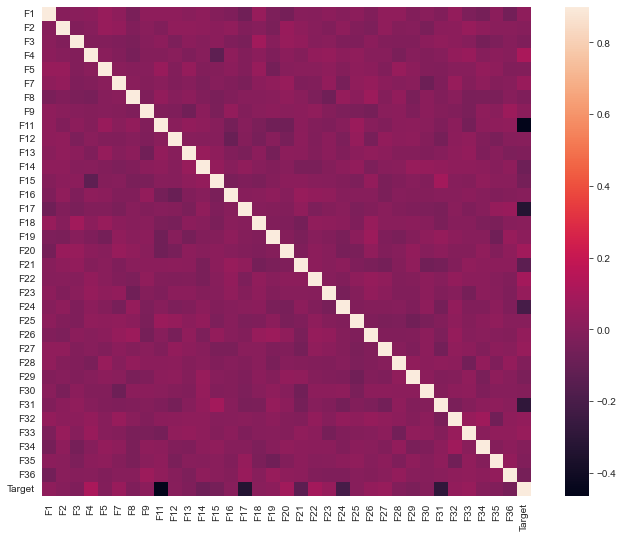

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [6]:
# this function is used to print the types of data types
data.dtypes

F1        float64
F2        float64
F3        float64
F4        float64
F5        float64
F6         object
F7        float64
F8        float64
F9        float64
F10        object
F11       float64
F12       float64
F13       float64
F14       float64
F15       float64
F16       float64
F17         int64
F18       float64
F19       float64
F20       float64
F21         int64
F22       float64
F23       float64
F24       float64
F25       float64
F26       float64
F27       float64
F28       float64
F29       float64
F30       float64
F31       float64
F32       float64
F33       float64
F34       float64
F35       float64
F36       float64
Target    float64
dtype: object

# Categorical values

Categorical values are non numerical values that may have or not an ordinal relationship. If they have an ordinal relationship (example: low, mid, high or small, big), a simple approach is to transform directly to numerical value respecting the order

Pandas allows use to do this using a dictionary and the method replace.

In [7]:
# This function here is used to replace the values
cleanup = {"F10": {"Very low":0, "Very high":1, "High":2, "Low":3, "Medium":4}}
data.replace(cleanup, inplace=True)
# head is a function which is use to show the first 500 rows values
data.head(500)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,5602.44,830.44,-206.39,155.40,-17610.98,Rest,1756.56,1287.64,-47.26,0,...,-357.36,570.36,2.92,1347.88,166.24,-110.19,63.56,-319.32,38.34,-42.05
1,3692.22,1052.24,-217.92,5.22,-20193.62,USA,2246.56,2695.66,-65.96,2,...,-356.24,506.16,6.24,805.26,171.70,-89.94,73.25,-251.67,53.37,396.38
2,3939.39,853.77,-209.88,2.61,-15247.10,USA,2464.97,1975.96,-60.66,4,...,-382.04,948.96,5.97,1127.04,366.06,-31.29,76.42,-167.73,56.94,-13.75
3,4727.82,754.45,-318.92,39.30,-11792.16,USA,1229.09,2007.94,-39.16,3,...,-470.98,571.41,0.79,-297.04,137.04,-36.66,26.70,-120.30,54.84,3668.71
4,2649.75,735.06,-264.47,1.32,-24217.70,Rest,2294.62,1639.02,-65.66,0,...,-334.52,613.50,-0.37,1333.86,214.12,-150.15,101.78,-317.40,68.01,-151.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,3023.58,1000.27,-236.39,0.00,-15526.60,UK,2072.45,2691.22,-47.30,3,...,-448.14,390.60,-0.73,-393.10,138.06,-231.27,132.01,-437.61,49.29,561.05
496,4076.37,1075.45,-260.66,1.62,-8046.78,USA,2085.61,1686.52,-46.88,4,...,-436.34,467.13,2.07,1239.58,193.06,-155.37,55.87,-349.38,37.44,1958.62
497,1785.15,815.99,-209.19,1.26,-12268.50,Europe,2297.09,2566.22,-45.60,0,...,-332.50,457.02,-0.45,563.86,296.96,62.79,124.71,-285.90,51.63,815.94
498,4223.19,878.39,-230.26,0.00,-13663.56,UK,2469.70,2089.52,-56.56,0,...,-246.02,764.58,7.54,-778.62,221.00,-229.53,52.41,-449.22,37.44,25.52


In [8]:
#this function is used to print the types of data types
data.dtypes

F1        float64
F2        float64
F3        float64
F4        float64
F5        float64
F6         object
F7        float64
F8        float64
F9        float64
F10         int64
F11       float64
F12       float64
F13       float64
F14       float64
F15       float64
F16       float64
F17         int64
F18       float64
F19       float64
F20       float64
F21         int64
F22       float64
F23       float64
F24       float64
F25       float64
F26       float64
F27       float64
F28       float64
F29       float64
F30       float64
F31       float64
F32       float64
F33       float64
F34       float64
F35       float64
F36       float64
Target    float64
dtype: object

In [9]:
# This function here is used to replace the values
cleanup = {"F6": {"UK":0, "Europe":1, "USA":2, "Rest":3}}
data.replace(cleanup, inplace=True)
# head is a function which is use to show the first 20 rows values
data.head(20)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,5602.44,830.44,-206.39,155.40,-17610.98,3,1756.56,1287.64,-47.26,0,...,-357.36,570.36,2.92,1347.88,166.24,-110.19,63.56,-319.32,38.34,-42.05
1,3692.22,1052.24,-217.92,5.22,-20193.62,2,2246.56,2695.66,-65.96,2,...,-356.24,506.16,6.24,805.26,171.70,-89.94,73.25,-251.67,53.37,396.38
2,3939.39,853.77,-209.88,2.61,-15247.10,2,2464.97,1975.96,-60.66,4,...,-382.04,948.96,5.97,1127.04,366.06,-31.29,76.42,-167.73,56.94,-13.75
3,4727.82,754.45,-318.92,39.30,-11792.16,2,1229.09,2007.94,-39.16,3,...,-470.98,571.41,0.79,-297.04,137.04,-36.66,26.70,-120.30,54.84,3668.71
4,2649.75,735.06,-264.47,1.32,-24217.70,3,2294.62,1639.02,-65.66,0,...,-334.52,613.50,-0.37,1333.86,214.12,-150.15,101.78,-317.40,68.01,-151.98
5,5373.96,1293.36,-278.50,1.05,-15633.98,2,1860.60,1949.48,-60.94,1,...,-266.08,554.31,3.57,1021.24,205.38,-106.29,103.62,-235.47,54.39,72.89
6,6008.91,686.41,-148.83,255.96,-23751.78,2,2043.25,1124.82,-47.88,0,...,-313.02,607.41,6.31,377.64,133.20,-113.40,62.43,-321.24,56.67,200.40
7,3202.92,983.12,-263.05,0.12,-18790.04,0,2642.02,2574.96,-45.98,2,...,-283.22,530.28,3.61,200.50,133.10,-129.18,67.86,-331.20,53.19,1550.61
8,4010.01,760.50,-235.32,0.78,-14320.92,2,2139.19,1865.10,-69.16,2,...,-376.20,634.41,3.83,111.60,178.50,-198.87,74.34,-250.29,47.19,3319.75
9,4094.46,184.13,-271.96,0.09,-11350.12,3,2704.87,1358.72,-51.50,1,...,-229.50,627.21,0.03,434.58,295.48,-146.07,79.47,-113.61,57.27,2.18


In [10]:
#this function is used to print the types of data types
data.dtypes

F1        float64
F2        float64
F3        float64
F4        float64
F5        float64
F6          int64
F7        float64
F8        float64
F9        float64
F10         int64
F11       float64
F12       float64
F13       float64
F14       float64
F15       float64
F16       float64
F17         int64
F18       float64
F19       float64
F20       float64
F21         int64
F22       float64
F23       float64
F24       float64
F25       float64
F26       float64
F27       float64
F28       float64
F29       float64
F30       float64
F31       float64
F32       float64
F33       float64
F34       float64
F35       float64
F36       float64
Target    float64
dtype: object

In [11]:
# head is a function which is use to show the first 5 rows values
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,5602.44,830.44,-206.39,155.40,-17610.98,3,1756.56,1287.64,-47.26,0,...,-357.36,570.36,2.92,1347.88,166.24,-110.19,63.56,-319.32,38.34,-42.05
1,3692.22,1052.24,-217.92,5.22,-20193.62,2,2246.56,2695.66,-65.96,2,...,-356.24,506.16,6.24,805.26,171.70,-89.94,73.25,-251.67,53.37,396.38
2,3939.39,853.77,-209.88,2.61,-15247.10,2,2464.97,1975.96,-60.66,4,...,-382.04,948.96,5.97,1127.04,366.06,-31.29,76.42,-167.73,56.94,-13.75
3,4727.82,754.45,-318.92,39.30,-11792.16,2,1229.09,2007.94,-39.16,3,...,-470.98,571.41,0.79,-297.04,137.04,-36.66,26.70,-120.30,54.84,3668.71
4,2649.75,735.06,-264.47,1.32,-24217.70,3,2294.62,1639.02,-65.66,0,...,-334.52,613.50,-0.37,1333.86,214.12,-150.15,101.78,-317.40,68.01,-151.98


# Spliting the Data

In this section, we are spliting the loaded data into two variables X and y. In X, we have all the columns data except the class column values as they are moved to y.

In [12]:
# Class column is splitted in to y variable from csv data file
y = data.Target
# data is moved to x variable by dropping Class Column
X = data.drop('Target', axis=1)
# Here head is used to print first 10 rows
X.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36
0,5602.44,830.44,-206.39,155.40,-17610.98,3,1756.56,1287.64,-47.26,0,...,5.58,-357.36,570.36,2.92,1347.88,166.24,-110.19,63.56,-319.32,38.34
1,3692.22,1052.24,-217.92,5.22,-20193.62,2,2246.56,2695.66,-65.96,2,...,13.16,-356.24,506.16,6.24,805.26,171.70,-89.94,73.25,-251.67,53.37
2,3939.39,853.77,-209.88,2.61,-15247.10,2,2464.97,1975.96,-60.66,4,...,9.06,-382.04,948.96,5.97,1127.04,366.06,-31.29,76.42,-167.73,56.94
3,4727.82,754.45,-318.92,39.30,-11792.16,2,1229.09,2007.94,-39.16,3,...,8.10,-470.98,571.41,0.79,-297.04,137.04,-36.66,26.70,-120.30,54.84
4,2649.75,735.06,-264.47,1.32,-24217.70,3,2294.62,1639.02,-65.66,0,...,17.46,-334.52,613.50,-0.37,1333.86,214.12,-150.15,101.78,-317.40,68.01
5,5373.96,1293.36,-278.50,1.05,-15633.98,2,1860.60,1949.48,-60.94,1,...,-3.02,-266.08,554.31,3.57,1021.24,205.38,-106.29,103.62,-235.47,54.39
6,6008.91,686.41,-148.83,255.96,-23751.78,2,2043.25,1124.82,-47.88,0,...,16.72,-313.02,607.41,6.31,377.64,133.20,-113.40,62.43,-321.24,56.67
7,3202.92,983.12,-263.05,0.12,-18790.04,0,2642.02,2574.96,-45.98,2,...,4.74,-283.22,530.28,3.61,200.50,133.10,-129.18,67.86,-331.20,53.19
8,4010.01,760.50,-235.32,0.78,-14320.92,2,2139.19,1865.10,-69.16,2,...,0.46,-376.20,634.41,3.83,111.60,178.50,-198.87,74.34,-250.29,47.19
9,4094.46,184.13,-271.96,0.09,-11350.12,3,2704.87,1358.72,-51.50,1,...,7.62,-229.50,627.21,0.03,434.58,295.48,-146.07,79.47,-113.61,57.27


# Training and Testing

In this part, we have divided our data stored in X and y into X_train, X_test, y_train and y_test. Here, we have also used the train_test_split function which divides the data into trai and test. The division of data is in the ratio of 80% in Train and 20% in Test

In [13]:
# Distribution of data into train and test of X and y.
# train_test_split function used for distribution of data.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
# Printing the text
print("\nX_train:\n")
# Printing 5 rows of X_train
print(X_train.head())
# Printing the current shape of array
print(X_train.shape)

# Printing the text
print("\nX_test:\n")
# Printing 5 rows of X_test
print(X_test.head())
# Printing the current shape of array
print(X_test.shape)

# Printing the text
print("\ny_train:\n")
# Printing 5 rows of y_train
print(y_train.head())
# Printing the current shape of array
print(y_train.shape)

# Printing the text
print("\ny_train:\n")
# Printing 5 rows of y_train
print(y_test.head())
# Printing the current shape of array
print(y_test.shape)


X_train:

           F1       F2      F3     F4        F5  F6       F7       F8     F9  \
1120  4920.00  1222.45 -242.57   0.75 -14541.06   2  2194.23  3230.22 -56.50   
970   5324.52   706.44 -246.75   4.89 -17215.00   3  2099.22  1603.54 -45.16   
399   3904.80   477.96 -177.55  51.93 -10083.22   1  1536.94  2011.58 -38.92   
1251  4788.15   191.01 -212.30  10.20 -11969.40   3  2391.41  1526.74 -49.44   
685   4187.04   411.55 -234.79   0.54 -22982.06   2  1930.79  1624.32 -54.40   

      F10  ...    F27     F28     F29   F30      F31     F32     F33     F34  \
1120    4  ...  10.94 -335.62  629.37 -4.18  -293.72  131.64 -203.76   44.89   
970     1  ...  19.00 -722.24  564.18  7.84   795.22  242.46 -120.33  104.48   
399     0  ...  11.54 -357.78  466.62 -1.95  1291.44  253.16 -192.63  144.87   
1251    2  ...  11.30 -279.36  672.54  6.99   875.36  213.10 -142.56   64.51   
685     1  ...  -4.34 -436.88  582.54  4.16   398.90  224.64  -70.11  108.97   

         F35    F36  
1120 

# Regression

Regression is a statistical method used in finance, investing, and other disciplines that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables)

There are so many types of regression. Few of them I will mention here and out of them I will also mentytion which I used to predecit the output which I feels give the best result. They are:

Linear Regression
Logistic Regression
Ridge Regression
Lasso Regression
Polynomial Regression
Quantile Regression
Elastic Net Regression
Support Vector Regression
Negative Binomial Regression
Poisson Regression

1. Linear Regression
2. Logistic Regression
3. Ridge Regression
4. Lasso Regression
5. Polynomial Regression
6. Quantile Regression
7. Elastic Net Regression
8. Support Vector Regression
9. Negative Binomial Regression
10. Poisson Regression

# Lasso Regression

LASSO (Least Absolute Shrinkage and Selection Operator) is a regression technique that was introduced first in geophysics. The term “Lasso” was coined by Professor Robert Tibshirani. Just like Ridge Regression, it uses regularization to estimate the results. Plus it also uses variable selection to make the model more efficient.

Implementation of Lasso Regression:

In [14]:
regr = Lasso()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error( y_test, y_pred)
rmse = math.sqrt(mse)
print(r2_score(y_test, y_pred))
print(rmse)
print(mse)

0.4725197730811189
852.9669194412164
727552.5656610385


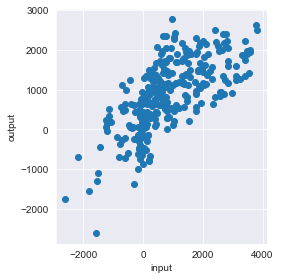

In [15]:
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred)
plt.plot([0, 100], [0, 100])
plt.axis('tight')
plt.xlabel('input')
plt.ylabel('output')
plt.tight_layout()

# Ridge Regression

To understand Ridge Regression we first need to get through the concept of Regularization. Regularization: There are two types of Regularization, L1 regularization & L2 regularization. L1 regularization adds an L1 penalty equal to the value of coefficients to restrict the size of coefficients, which leads to the removal of some coefficients. On the other hand, L2 regularization adds a penalty L2 which is equal to the square of coefficients.

Implementation of Ridge Regression:

In [16]:
Rregr = Ridge()
Rregr.fit(X_train, y_train)
R_pred = Rregr.predict(X_test)
mse = mean_squared_error(y_test, R_pred)
rmse = math.sqrt(mse)
print(r2_score( y_test, R_pred))
print(rmse)
print(mse)

0.47245847628594373
853.0164782844006
727637.1122247212


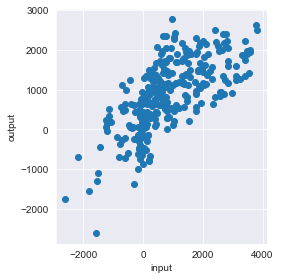

In [17]:
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred)
plt.plot([0, 100], [0, 100])
plt.axis('tight')
plt.xlabel('input')
plt.ylabel('output')
plt.tight_layout()

# Linear Regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable

Implementation of Linear Regression:

In [18]:
Lregr = LinearRegression()
Lregr.fit(X_train, y_train)
L_pred = Lregr.predict(X_test)
mse = mean_squared_error(y_test, L_pred)
rmse = math.sqrt(mse)
print(r2_score( y_test, L_pred))
print(rmse)
print(mse)

0.47245404725053686
853.0200590757557
727643.2211856059


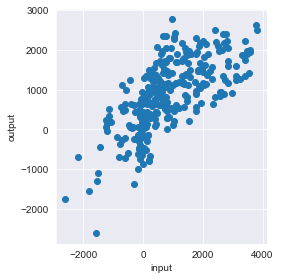

In [19]:
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred)
plt.plot([0, 100], [0, 100])
plt.axis('tight')
plt.xlabel('input')
plt.ylabel('output')
plt.tight_layout()

### Part B

In [20]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P3_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

# This function here is used to replace the values
cleanup = {"F6": {"UK":0, "Europe":1, "USA":2, "Rest":3}}
test_data.replace(cleanup, inplace=True)

# This function here is used to replace the values
cleanup = {"F10": {"Very low":0, "Very high":1, "High":2, "Low":3, "Medium":4}}
test_data.replace(cleanup, inplace=True)

predicted = Lregr.predict(test_data)
# CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])